In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
train = pd.read_csv('/content/drive/MyDrive/Program Skripsi/Dataset/training.csv', delimiter = ";", index_col = 0)
test = pd.read_csv('/content/drive/MyDrive/Program Skripsi/Dataset/testing.csv', delimiter = ";", index_col = 0)

In [ ]:
test = test.set_axis(['Temp_min', 'Temp_max', 'Temp_avg', 'Kel_avg','Curah_hujan','Lama_sun','Kec_angin_max','Arah_angin_max','Kec_angin_avg','Angin_byk'], axis=1, inplace=False)
train = train.set_axis(['Temp_min', 'Temp_max', 'Temp_avg', 'Kel_avg','Curah_hujan','Lama_sun','Kec_angin_max','Arah_angin_max','Kec_angin_avg','Angin_byk'], axis=1, inplace=False)

In [ ]:
test['Curah_hujan'] = test['Curah_hujan'].replace(8888.0, 0)

In [ ]:
train['Curah_hujan'] = train['Curah_hujan'].replace(8888.0, 0)

In [ ]:
test = test.fillna(test.mean())
test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


,Temp_min,Temp_max,Temp_avg,Kel_avg,Curah_hujan,Lama_sun,Kec_angin_max,Arah_angin_max,Kec_angin_avg,Angin_byk
Tanggal,,,,,,,,,,
01-01-2021,21.3,28.4,22.8,92.0,28.0,4.4,3,150,1,C
02-01-2021,21.6,26.4,23.7,88.0,21.3,2.2,4,110,2,C
03-01-2021,20.8,28.1,24.2,86.0,1.5,0.8,5,120,2,SE
04-01-2021,21.2,27.2,23.1,90.0,0.6,2.4,4,120,1,C
05-01-2021,20.4,26.8,23.1,90.0,55.3,0.1,2,150,1,C
...,...,...,...,...,...,...,...,...,...,...
21-12-2021,21.0,28.6,24.4,82.0,22.6,4.3,6,60,2,NE
22-12-2021,20.8,29.4,24.5,85.0,0.5,1.4,4,50,2,C
23-12-2021,21.5,29.8,24.1,85.0,0.0,4.8,4,160,1,C


In [ ]:
train = train.fillna(train.mean())
train

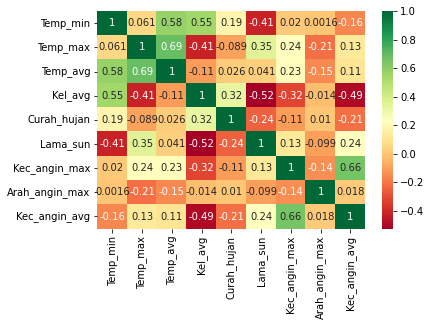

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
kor_train = train.corr()
sns.heatmap(kor_train,annot = True,fmt=".2g",cmap='RdYlGn')
plt.show()

In [ ]:
columns = ['Temp_min', 'Temp_max', 'Temp_avg', 'Kel_avg','Curah_hujan','Kec_angin_max','Arah_angin_max']
train = pd.DataFrame(train, columns=columns)
test = pd.DataFrame(test, columns=columns)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fca61620790>,
      dtype=object)

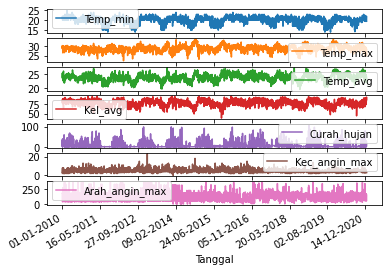

In [ ]:
train.plot(subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7ebfc16890>,
      dtype=object)

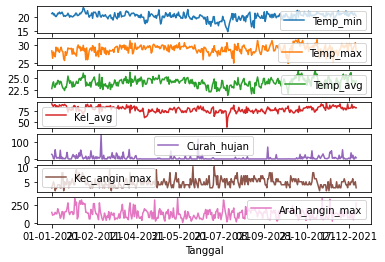

In [ ]:
test.plot(subplots=True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#scaler = StandardScaler()
# fit and transform in one step
df = scaler.fit_transform(train)
df2 = scaler.fit_transform(test)
df = pd.DataFrame(df)
df2 = pd.DataFrame(df2)

In [ ]:
y_train = df[4]  # dependent or target 
x_train = df.drop([4],axis = 1)  # indepedent or input
y_test = df2[4]  # dependent or target 
x_test = df2.drop([4],axis = 1)  # indepedent or input

x_train_reshape = x_train.values.reshape((x_train.shape[0], 1, x_train.shape[1]))
y_train_reshape = y_train.values.reshape((y_train.shape[0],1,1))

x_test_reshape = x_test.values.reshape((x_test.shape[0], 1, x_test.shape[1]))
y_test_reshape = y_test.values.reshape((y_test.shape[0],1,1))

In [1]:
from keras.layers import Dropout, Dense, LSTM
from keras.models import Sequential
model = Sequential()
#layer 1
model.add(LSTM(100,return_sequences=True, activation ='relu', input_shape =(1,x_train.shape[1])))
model.add(Dropout(0.2))

#layer 2
model.add(LSTM(100,activation ='relu',return_sequences=True,))
model.add(Dropout(0.2))

#layer 3
model.add(LSTM(100,activation ='relu',return_sequences=True,))
model.add(Dropout(0.2))

#layer 4
model.add(LSTM(100,activation ='relu'))
model.add(Dropout(0.2))

model.add(Dense(units =1, activation='relu'))

SyntaxError: ignored

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 100)            42800     
                                                                 
 dropout (Dropout)           (None, 1, 100)            0         
                                                                 
 lstm_1 (LSTM)               (None, 1, 100)            80400     
                                                                 
 dropout_1 (Dropout)         (None, 1, 100)            0         
                                                                 
 lstm_2 (LSTM)               (None, 1, 100)            80400     
                                                                 
 dropout_2 (Dropout)         (None, 1, 100)            0         
                                                                 
 lstm_3 (LSTM)               (None, 100)               8

In [ ]:
model.compile(optimizer="adam", loss="mean_squared_error", metrics = ['accuracy'])
history = model.fit(x_train_reshape,y_train_reshape,epochs = 10, batch_size = 64)

Epoch 1/50
63/63 [==============================] - 6s 11ms/step - loss: 0.0140 - accuracy: 0.5431
Epoch 2/50
63/63 [==============================] - 1s 11ms/step - loss: 0.0136 - accuracy: 0.5431
Epoch 3/50
63/63 [==============================] - 1s 11ms/step - loss: 0.0132 - accuracy: 0.5431
Epoch 4/50
63/63 [==============================] - 1s 10ms/step - loss: 0.0126 - accuracy: 0.5431
Epoch 5/50
63/63 [==============================] - 1s 10ms/step - loss: 0.0124 - accuracy: 0.5431
Epoch 6/50
63/63 [==============================] - 1s 10ms/step - loss: 0.0125 - accuracy: 0.5431
Epoch 7/50
63/63 [==============================] - 1s 11ms/step - loss: 0.0124 - accuracy: 0.5431
Epoch 8/50
63/63 [==============================] - 1s 11ms/step - loss: 0.0124 - accuracy: 0.5431
Epoch 9/50
63/63 [==============================] - 1s 11ms/step - loss: 0.0125 - accuracy: 0.5431
Epoch 10/50
63/63 [==============================] - 1s 10ms/step - loss: 0.0124 - accuracy: 0.5431
Epoch 11/

In [ ]:
model.save("/content/drive/MyDrive/Model/model-A1-50.h5")
print("Saved model to disk")

<function matplotlib.pyplot.show>

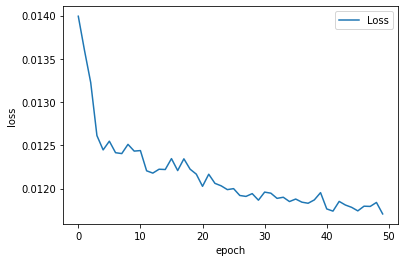

In [ ]:
plt.plot(history.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Loss'], loc = 'upper right')
plt.show

In [ ]:
scores = model.evaluate( x_train_reshape, y_train_reshape, verbose =0)
print("Model accuracy : %.2f%%" % (scores[1]*100))

Model accuracy : 54.31%


In [ ]:
from keras.models import load_model

from keras.models import load_model
model = load_model('/content/drive/MyDrive/Model/model-A1-50.h5')

In [ ]:
inverse_scale = MinMaxScaler()
inverse_scale.min_, inverse_scale.scale_ = scaler.min_[4], scaler.scale_[4]

predict = model.predict(x_test_reshape)
predicted = inverse_scale.inverse_transform(predict.reshape((x_test_reshape.shape[0],1)))
y_test_convert = inverse_scale.inverse_transform(y_test_reshape.reshape((y_test_reshape.shape[0],1)))

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

mse = mean_squared_error(y_test_convert,predicted)
print ("MSE : ",mse)
rmse = sqrt(mse)
print ("RMSE : ",rmse)
mae = mean_absolute_error(y_test_convert,predicted)
print ("MAE : ",mae)

MSE :  200.75762729287013
RMSE :  14.168896474068477
MAE :  7.697809215779584


In [ ]:
y_act = pd.DataFrame(y_test_convert)
y_act.columns = ['Actual']
y_act.index = test.index

In [ ]:
pred = pd.DataFrame(predicted)
pred.columns = ['Prediksi']
pred.index = test.index

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(y_act, color='blue', label='Actual values')
plt.plot(pred, color='red', label='Predicted')
plt.title('Test data')
plt.xlabel('Tanggal')
plt.ylabel('Curah Hujan')
plt.legend(loc='best')